In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 


In [35]:
flat = pd.read_excel(r"C:\Users\ravin\Downloads\final model data.xlsx")


In [36]:
flat

,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,BHK,...,Other,servant,Store,Pooja,Study,luxury_score,Furnished,carpet12,Build,Super_area
0,flat,maa bhagwati residency,0.45,5000.0,2,2,1,4.0,moderate,2,...,0,0,0,0,0,28,1,899.969679,1012.526436,1125.490664
1,flat,apna enclave,0.50,7692.0,2,2,1,1.0,very old,2,...,0,0,0,0,0,37,0,650.031921,731.329643,812.921674
2,flat,tulsiani easy in homes,0.40,6722.0,2,2,3,12.0,new,2,...,0,0,0,0,0,36,1,595.028392,669.446973,744.134959
3,flat,smart world orchard,1.47,12250.0,2,2,2,2.0,new,2,...,0,0,0,0,0,76,1,1199.959572,1350.035248,1500.654218
4,flat,parkwood westend,0.70,5204.0,2,2,3,5.0,under construction,2,...,0,0,0,0,0,0,1,1075.454140,1209.958261,1344.949305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,House,DLF City Phase 1,5.50,30556.0,4,4,3,2.0,old,4,...,0,1,0,1,1,69,1,1307.324582,1384.129901,1797.571300
3729,House,DLF City Plots Phase 2,4.25,31481.0,3,2,3,2.0,very old,3,...,0,0,0,0,1,35,0,978.536364,1036.025375,1345.487500
3730,House,DLF City Phase 1,4.50,33333.0,3,3,2,2.0,old,3,...,0,1,0,0,1,70,1,978.536364,1036.025375,1345.487500
3731,House,DLF City Phase 1,3.25,33129.0,3,3,3,2.0,very old,3,...,0,0,0,0,1,79,1,712.374473,754.226473,979.514900


#  Outliers

In [31]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3733 entries, 0 to 3732
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_type   3733 non-null   object 
 1   society         3318 non-null   object 
 2   price           3731 non-null   float64
 3   price_per_sqft  3731 non-null   float64
 4   bedRoom         3733 non-null   int64  
 5   bathroom        3733 non-null   int64  
 6   balcony         3733 non-null   object 
 7   floorNum        3714 non-null   float64
 8   agePossession   3733 non-null   object 
 9   BHK             3733 non-null   int64  
 10  Location        3733 non-null   object 
 11  Other           3733 non-null   int64  
 12  servant         3733 non-null   int64  
 13  Store           3733 non-null   int64  
 14  Pooja           3733 non-null   int64  
 15  Study           3733 non-null   int64  
 16  luxury_score    3733 non-null   int64  
 17  Furnished       3733 non-null   i

# Price_Per_Square

<Axes: >

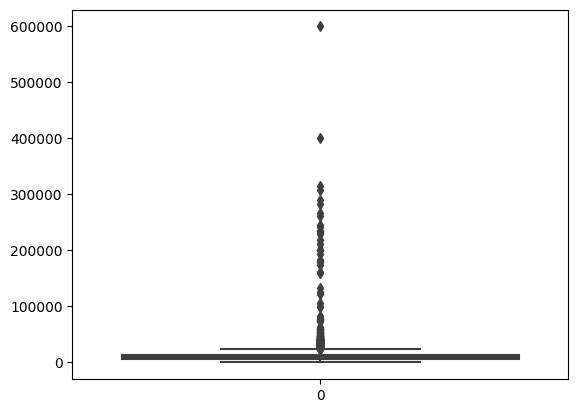

In [37]:
sns.boxplot(flat['price_per_sqft'])

In [38]:
flat['price_per_sqft'].describe()

count      3731.000000
mean      13731.588850
std       22974.345886
min           2.000000
25%        6789.000000
50%        9000.000000
75%       13889.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [40]:
q31 = flat['price_per_sqft'].quantile(0.75)

q11 = flat['price_per_sqft'].quantile(0.25)

IQR1 = q31 - q11

high_fence1 = q31 + (1.5 * IQR1)
lower_fence1 = q11 - (1.5 * IQR1)

In [41]:
high_fence1

24539.0

In [42]:
lower_fence1

-3861.0

In [44]:
cleaned2 = flat[flat['price_per_sqft'] < high_fence1]

In [45]:
outliers = flat[flat['price_per_sqft'] >= high_fence1]

In [46]:
outliers

,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,BHK,...,Other,servant,Store,Pooja,Study,luxury_score,Furnished,carpet12,Build,Super_area
30,flat,ompee k s residency,1.60,26936.0,2,2,2,1.0,moderate,2,...,0,0,0,0,0,0,1,593.952002,668.235961,742.788839
247,flat,tulip monsella,8.25,28000.0,3,4,3,8.0,under construction,3,...,0,1,0,0,0,35,2,2350.850655,2644.865145,2939.944007
252,flat,emaar digihomes,4.25,26562.0,3,3,3,8.0,under construction,3,...,0,0,0,0,0,16,1,1599.946096,1800.046997,2000.872291
279,flat,dlf the grove,5.70,41245.0,3,3,3,1.0,unknown,3,...,0,0,0,0,0,0,1,1228.350650,1381.977121,1536.159741
304,flat,puri the aravallis,3.90,33209.0,3,4,3+,33.0,under construction,3,...,0,1,0,0,0,158,1,1249.688790,1405.983964,1562.844947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,House,NaN,4.75,28787.0,3,3,3,2.0,old,3,...,0,0,1,0,0,96,1,1166.415345,1234.942247,1603.821100
3728,House,DLF City Phase 1,5.50,30556.0,4,4,3,2.0,old,4,...,0,1,0,1,1,69,1,1307.324582,1384.129901,1797.571300
3729,House,DLF City Plots Phase 2,4.25,31481.0,3,2,3,2.0,very old,3,...,0,0,0,0,1,35,0,978.536364,1036.025375,1345.487500
3730,House,DLF City Phase 1,4.50,33333.0,3,3,2,2.0,old,3,...,0,1,0,0,1,70,1,978.536364,1036.025375,1345.487500


# bedRoom

In [48]:
cleaned2['bedRoom'].unique()

array([ 2,  3,  4,  1,  5,  6,  7,  9,  8, 19, 10, 36, 34, 12, 11],
      dtype=int64)

C:\Users\ravin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


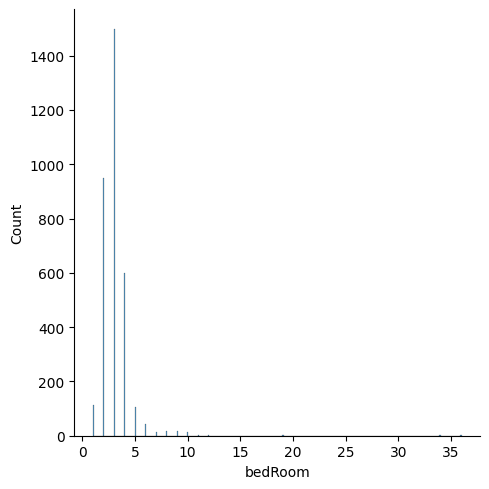

In [49]:
sns.displot(cleaned2['bedRoom'], kind='hist')

<Axes: >

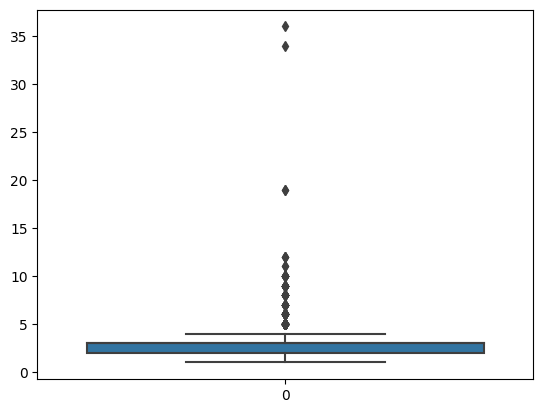

In [331]:
sns.boxplot(cleaned2['BedRoom'])

In [51]:
cleaned3 = cleaned2[cleaned2['bedRoom'] <= 20]

In [52]:
cleaned3

,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,BHK,...,Other,servant,Store,Pooja,Study,luxury_score,Furnished,carpet12,Build,Super_area
0,flat,maa bhagwati residency,0.45,5000.0,2,2,1,4.0,moderate,2,...,0,0,0,0,0,28,1,899.969679,1012.526436,1125.490664
1,flat,apna enclave,0.50,7692.0,2,2,1,1.0,very old,2,...,0,0,0,0,0,37,0,650.031921,731.329643,812.921674
2,flat,tulsiani easy in homes,0.40,6722.0,2,2,3,12.0,new,2,...,0,0,0,0,0,36,1,595.028392,669.446973,744.134959
3,flat,smart world orchard,1.47,12250.0,2,2,2,2.0,new,2,...,0,0,0,0,0,76,1,1199.959572,1350.035248,1500.654218
4,flat,parkwood westend,0.70,5204.0,2,2,3,5.0,under construction,2,...,0,0,0,0,0,0,1,1075.454140,1209.958261,1344.949305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,House,NaN,5.65,23870.0,8,6,3+,3.0,old,8,...,0,1,0,0,0,67,1,1722.224000,1823.404660,2368.058000
3723,House,NaN,3.55,24500.0,5,4,3+,3.0,old,5,...,0,1,0,0,0,73,1,1056.819273,1118.907405,1453.126500
3725,House,NaN,3.10,20026.0,5,4,3+,2.0,old,5,...,0,1,1,0,0,59,1,1127.273891,1193.501232,1550.001600
3727,House,Silverglades Tarudhan Valley Golf Resort,3.05,12551.0,3,3,2,2.0,old,3,...,1,1,0,1,1,160,1,1769.193745,1873.133878,2432.641400


# bathroom

In [53]:
cleaned3['bathroom'].unique()

array([ 2,  3,  4,  5,  1,  6,  7,  9, 17,  8, 10, 11, 12], dtype=int64)

<Axes: xlabel='bathroom', ylabel='Count'>

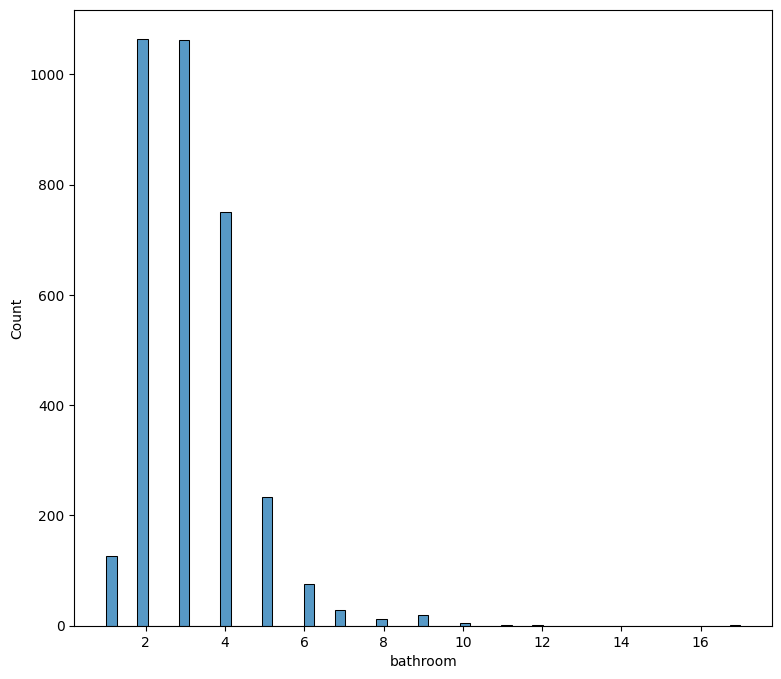

In [54]:
plt.figure(figsize=(9,8))
sns.histplot(cleaned3['bathroom'])

<Axes: >

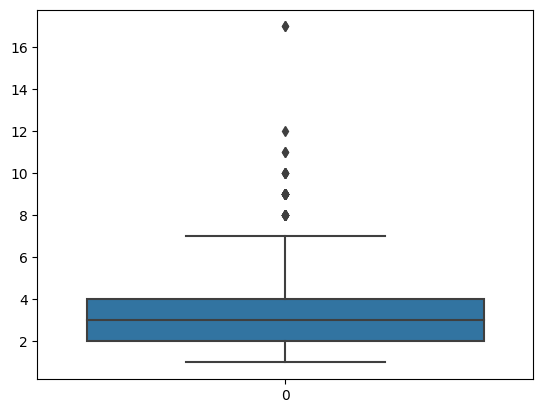

In [55]:
sns.boxplot(cleaned3['bathroom'])

In [56]:
cleaned3['bathroom'].value_counts()

bathroom
2     1064
3     1062
4      751
5      233
1      126
6       75
7       29
9       19
8       12
10       5
17       2
11       2
12       1
Name: count, dtype: int64

In [57]:
cleaned4 = cleaned3[cleaned3['bathroom'] <= 8]

In [58]:
cleaned4

,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,BHK,...,Other,servant,Store,Pooja,Study,luxury_score,Furnished,carpet12,Build,Super_area
0,flat,maa bhagwati residency,0.45,5000.0,2,2,1,4.0,moderate,2,...,0,0,0,0,0,28,1,899.969679,1012.526436,1125.490664
1,flat,apna enclave,0.50,7692.0,2,2,1,1.0,very old,2,...,0,0,0,0,0,37,0,650.031921,731.329643,812.921674
2,flat,tulsiani easy in homes,0.40,6722.0,2,2,3,12.0,new,2,...,0,0,0,0,0,36,1,595.028392,669.446973,744.134959
3,flat,smart world orchard,1.47,12250.0,2,2,2,2.0,new,2,...,0,0,0,0,0,76,1,1199.959572,1350.035248,1500.654218
4,flat,parkwood westend,0.70,5204.0,2,2,3,5.0,under construction,2,...,0,0,0,0,0,0,1,1075.454140,1209.958261,1344.949305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,House,NaN,5.65,23870.0,8,6,3+,3.0,old,8,...,0,1,0,0,0,67,1,1722.224000,1823.404660,2368.058000
3723,House,NaN,3.55,24500.0,5,4,3+,3.0,old,5,...,0,1,0,0,0,73,1,1056.819273,1118.907405,1453.126500
3725,House,NaN,3.10,20026.0,5,4,3+,2.0,old,5,...,0,1,1,0,0,59,1,1127.273891,1193.501232,1550.001600
3727,House,Silverglades Tarudhan Valley Golf Resort,3.05,12551.0,3,3,2,2.0,old,3,...,1,1,0,1,1,160,1,1769.193745,1873.133878,2432.641400


# Floor

In [59]:
cleaned4['floorNum'].unique()

array([ 4.,  1., 12.,  2.,  5.,  3., 14., 31., 13., 25.,  0., 11., 10.,
       20.,  8., 21.,  6.,  9., 18., 29.,  7., 15., 32., 23., 43., 16.,
       19., nan, 17., 28., 27., 33., 35., 26., 39., 22., 24., 30., 38.,
       45., 44., 34., 40., 51.])

<Axes: >

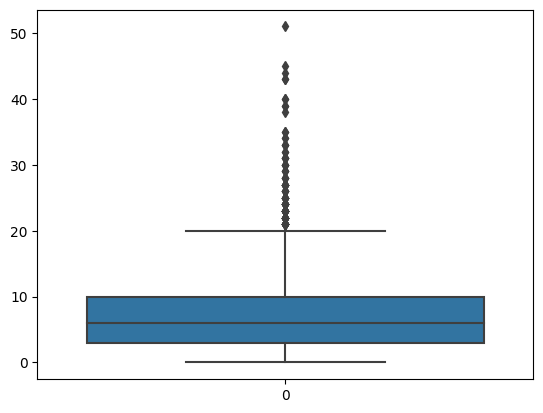

In [60]:
sns.boxplot(cleaned4['floorNum'])

In [61]:
q14 = cleaned4['floorNum'].quantile(0.25)
q34 = cleaned4['floorNum'].quantile(0.75)
IQR4 =  q34 - q14

In [62]:
high32 = q34 + (1.5 * IQR4)
low32 = q14 - (1.5 * IQR4)

In [63]:
high32

20.5

In [64]:
cleaned5 = cleaned4[(cleaned4['floorNum'] <= 37) & (cleaned4['floorNum'] >= low32)]

<Axes: >

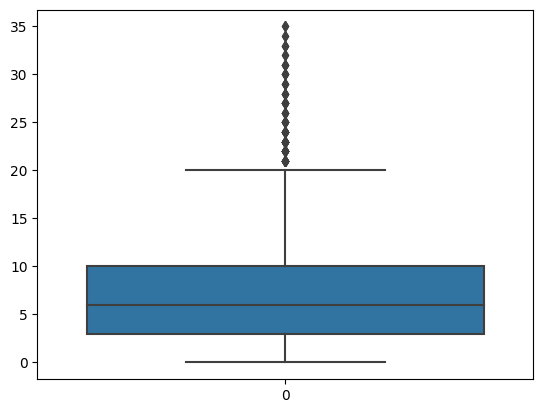

In [66]:
sns.boxplot(cleaned5['floorNum'])

In [67]:
cleaned5.shape

(3331, 21)

# balcony

In [347]:
cleaned5

,Property_Type,Society,Price,Price_Per_Square,BedRoom,Bathroom,Balcony,NoofFLoor,Facing,AgeOfProperty,...,Location,Other,Servant,Store,Pooja,Luxery_Score,Furnished,Bulidt,Carpet,Super
0,flat,maa bhagwati residency,0.45,5000.0,2,2,1,4.0,West,moderate,...,Krishna Colony,0,0,0,0.0,28,0,0.0,900,NaN
1,flat,apna enclave,0.50,7692.0,2,2,1,1.0,West,very old,...,Ashok Vihar,0,0,0,0.0,37,2,0.0,650,NaN
2,flat,tulsiani easy in homes,0.40,6722.0,2,2,3,12.0,NaN,new,...,Sohna,0,0,0,0.0,36,0,0.0,595,NaN
3,flat,smart world orchard,1.47,12250.0,2,2,2,2.0,NaN,new,...,Sector 61,0,0,0,0.0,76,0,0.0,1200,NaN
4,flat,parkwood westend,0.70,5204.0,2,2,3,5.0,NaN,under construction,...,Sector 92,0,0,0,0.0,0,0,0.0,NaN,1345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,house,NaN,5.65,23870.0,8,6,3+,3.0,South-West,old,...,Sector 46 Gurgaon,0,1,0,0.0,67,2,2367.0,0,0.0
3745,house,NaN,3.55,24500.0,5,4,3+,3.0,North-West,old,...,Sector 46 Gurgaon,0,1,0,0.0,73,2,1449.0,0,0.0
3747,house,NaN,3.10,20026.0,5,4,3+,2.0,North-East,old,...,Sushant Lok Phase 2,0,1,1,0.0,59,2,1548.0,0,0.0
3749,house,Silverglades Tarudhan Valley Golf Resort,3.05,12551.0,3,3,2,2.0,NaN,old,...,Bissar,1,1,0,1.0,160,2,2430.0,0,0.0


In [68]:
cleaned5['balcony'].unique()

array([1, 3, 2, '3+', 0, '3+ '], dtype=object)

In [71]:
cleaned5

,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,BHK,...,Other,servant,Store,Pooja,Study,luxury_score,Furnished,carpet12,Build,Super_area
0,flat,maa bhagwati residency,0.45,5000.0,2,2,1,4.0,moderate,2,...,0,0,0,0,0,28,1,899.969679,1012.526436,1125.490664
1,flat,apna enclave,0.50,7692.0,2,2,1,1.0,very old,2,...,0,0,0,0,0,37,0,650.031921,731.329643,812.921674
2,flat,tulsiani easy in homes,0.40,6722.0,2,2,3,12.0,new,2,...,0,0,0,0,0,36,1,595.028392,669.446973,744.134959
3,flat,smart world orchard,1.47,12250.0,2,2,2,2.0,new,2,...,0,0,0,0,0,76,1,1199.959572,1350.035248,1500.654218
4,flat,parkwood westend,0.70,5204.0,2,2,3,5.0,under construction,2,...,0,0,0,0,0,0,1,1075.454140,1209.958261,1344.949305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,House,NaN,5.65,23870.0,8,6,3+,3.0,old,8,...,0,1,0,0,0,67,1,1722.224000,1823.404660,2368.058000
3723,House,NaN,3.55,24500.0,5,4,3+,3.0,old,5,...,0,1,0,0,0,73,1,1056.819273,1118.907405,1453.126500
3725,House,NaN,3.10,20026.0,5,4,3+,2.0,old,5,...,0,1,1,0,0,59,1,1127.273891,1193.501232,1550.001600
3727,House,Silverglades Tarudhan Valley Golf Resort,3.05,12551.0,3,3,2,2.0,old,3,...,1,1,0,1,1,160,1,1769.193745,1873.133878,2432.641400


# super

In [72]:
cleaned5['Super_area'].value_counts().head(5)

Super_area
1649.998231    38
1949.988124    38
2000.040259    26
1577.987740    25
2149.981386    22
Name: count, dtype: int64

<Axes: >

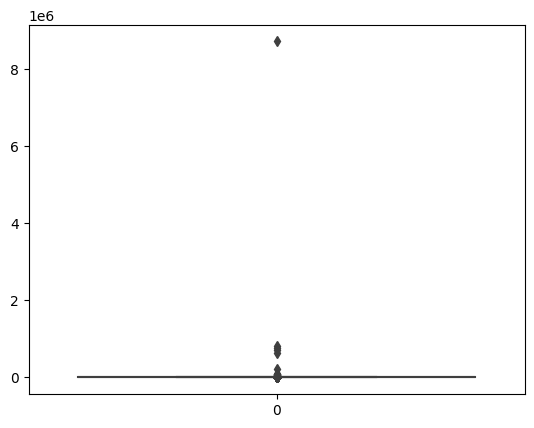

In [73]:
sns.boxplot(cleaned5['Super_area'])

In [ ]:
sns.displot(flat['Super_area'])

# Luxery_Score

<Axes: xlabel='luxury_score', ylabel='Count'>

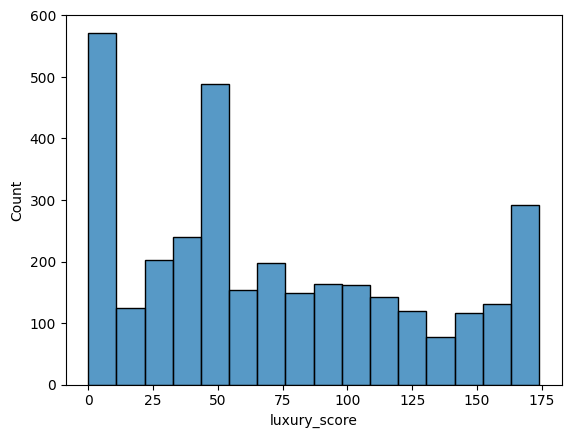

In [76]:
sns.histplot(cleaned5['luxury_score'])

<Axes: >

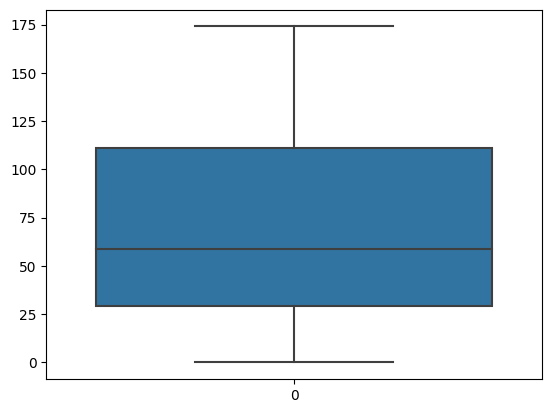

In [77]:
sns.boxplot(cleaned5['luxury_score'])

# Bulidt

In [78]:
cleaned5['Build'].unique()

array([1012.526436 ,  731.3296431,  669.4469725, ..., 3671.673929 ,
        447.562962 , 1483.588337 ])

<Axes: ylabel='Build'>

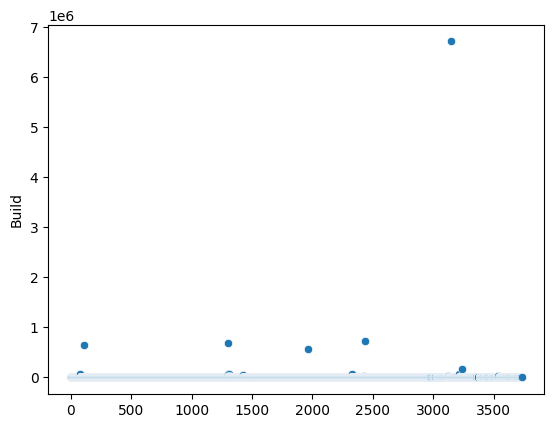

In [79]:
sns.scatterplot(cleaned5['Build'])

<Axes: ylabel='Build'>

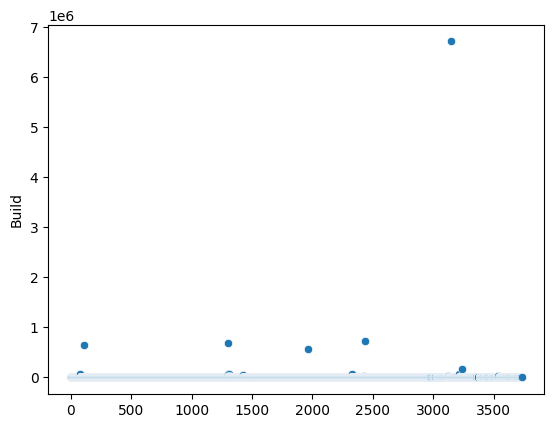

In [82]:
sns.scatterplot(cleaned5['Build'])

<Axes: xlabel='Bulidt', ylabel='Count'>

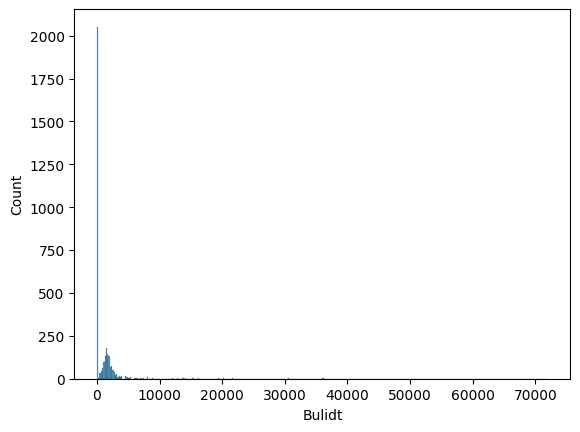

In [363]:
sns.histplot(cleaned7['Bulidt'])

In [364]:
cleaned7

,Property_Type,Society,Price,Price_Per_Square,BedRoom,Bathroom,Balcony,NoofFLoor,Facing,AgeOfProperty,...,Location,Other,Servant,Store,Pooja,Luxery_Score,Furnished,Bulidt,Carpet,Super
0,flat,maa bhagwati residency,0.45,5000.0,2,2,1,4.0,West,moderate,...,Krishna Colony,0,0,0,0.0,28,0,0.0,900,0.0
1,flat,apna enclave,0.50,7692.0,2,2,1,1.0,West,very old,...,Ashok Vihar,0,0,0,0.0,37,2,0.0,650,0.0
2,flat,tulsiani easy in homes,0.40,6722.0,2,2,3,12.0,0,new,...,Sohna,0,0,0,0.0,36,0,0.0,595,0.0
3,flat,smart world orchard,1.47,12250.0,2,2,2,2.0,0,new,...,Sector 61,0,0,0,0.0,76,0,0.0,1200,0.0
4,flat,parkwood westend,0.70,5204.0,2,2,3,5.0,0,under construction,...,Sector 92,0,0,0,0.0,0,0,0.0,0,1345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,house,0,5.65,23870.0,8,6,3+,3.0,South-West,old,...,Sector 46 Gurgaon,0,1,0,0.0,67,2,2367.0,0,0.0
3745,house,0,3.55,24500.0,5,4,3+,3.0,North-West,old,...,Sector 46 Gurgaon,0,1,0,0.0,73,2,1449.0,0,0.0
3747,house,0,3.10,20026.0,5,4,3+,2.0,North-East,old,...,Sushant Lok Phase 2,0,1,1,0.0,59,2,1548.0,0,0.0
3749,house,Silverglades Tarudhan Valley Golf Resort,3.05,12551.0,3,3,2,2.0,0,old,...,Bissar,1,1,0,1.0,160,2,2430.0,0,0.0


In [367]:
cleaned_data = cleaned7.reset_index()

cleaned_data1= cleaned_data.drop(['index'], axis=1)

In [83]:
filename = 'cleaned8_after_outliers.csv'
cleaned5.to_csv(filename, index=False)